# La Liga Season 24/25 data analysis

## Introduction

Data comes from a Laliga 23/24 season from understat.com.

### Points

xPts - "expected points" — the number of points a team should have earned based on the quality of chances created and conceded in matches.

Pts - actual points earned (3 for a win, 1 for a draw, 0 for a loss).

Interpretation:
xPts > Pts
- The team is performing better than their actual results suggest – they had chances to win or draw but lacked something (finishing, luck, defensive mistakes).

xPts < Pts
- The team is getting more points than expected based on performance – maybe they're clinical, lucky, or have a strong defense or goalkeeper.

### Goals

xG - "expected goals" — how many goals a team should have scored based on the quality and number of chances (e.g., a shot from 5 meters has higher xG than a shot from 25 meters).

G - actual goals scored.

Interpretation:
xG > G
- The team creates chances but doesn’t convert them – possibly due to poor finishing, bad luck, or weak attackers.

xG < G
- The team is very efficient – scoring more than expected, possibly due to excellent finishing or top-class strikers.

## Code

Imports.

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

Reads file called *laliga_table2324.csv*, data is collected from ***understat.com***.

In [60]:
plik = "laliga_table2324.csv"
df = pd.read_csv(plik, delimiter=";")

Prepares data for processing.

In [61]:
druzyny = df["Team"]
G = df["G"]
xG = df["xG"]
PTS = df["PTS"]
xPTS = df["xPTS"]

szerokosc = 0.35
x = np.arange(len(druzyny))

kolory_xGticks = []
kolory_xPTSticks = []
kolory_xG = []
kolory_xPTS = []

Colors for data visualization.

In [62]:
for i in range(len(druzyny)):
    if G[i] >= xG[i]:
        kolory_xG.append('lightgreen')
    else:
        kolory_xG.append('salmon')

    if PTS[i] >= xPTS[i]:
        kolory_xPTS.append('lightgreen')
    else:
        kolory_xPTS.append('salmon')

Column chart G from xG.

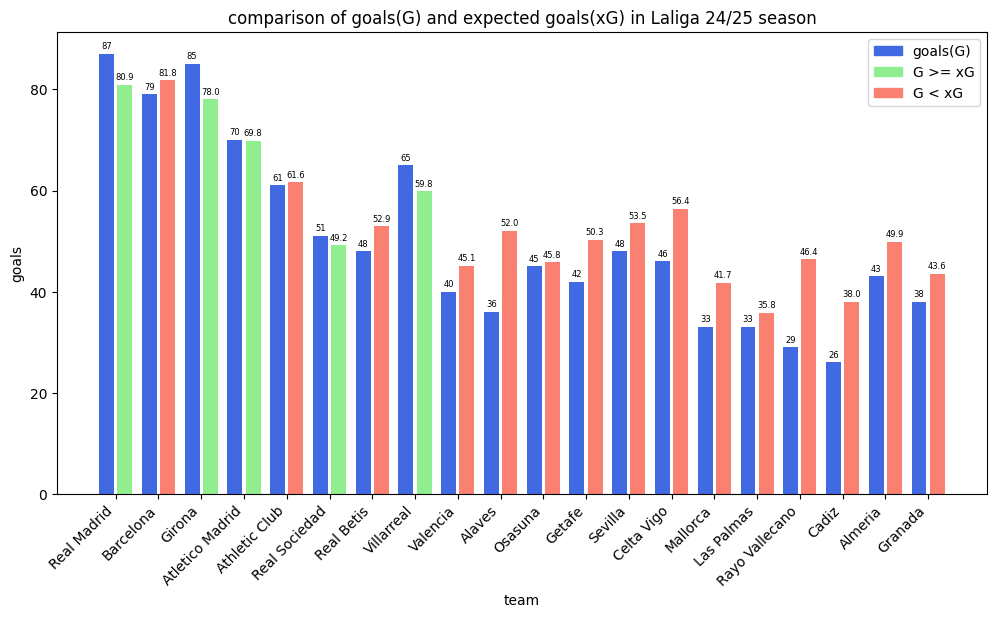

In [63]:
plt.figure(figsize=(12, 6))
bars_G = plt.bar(x - szerokosc / 1.65, G, szerokosc, label="goals(G)", color="royalblue")
bars_xG = plt.bar(x + szerokosc / 1.65, xG, szerokosc, label="expected goals(xG)", color=kolory_xG)

for i, (bar_G, bar_xG) in enumerate(zip(bars_G, bars_xG)):
    plt.text(bar_G.get_x() + bar_G.get_width() / 2, bar_G.get_height() + 1,
             f"{G[i]}", ha='center', fontsize=6)

    plt.text(bar_xG.get_x() + bar_xG.get_width() / 2, bar_xG.get_height() + 1,
             f"{xG[i]:.1f}", ha='center', fontsize=6, )

plt.xlabel("team")
plt.ylabel("goals")
plt.title("comparison of goals(G) and expected goals(xG) in Laliga 24/25 season")
legend_patches = [
    mpatches.Patch(color='royalblue', label='goals(G)'),
    mpatches.Patch(color='lightgreen', label='G >= xG'),
    mpatches.Patch(color='salmon', label='G < xG'),
]
plt.legend(handles=legend_patches)
xticks = plt.xticks(x, druzyny, rotation=45, ha="right")
plt.show()

Column chart PTS from xPTS.

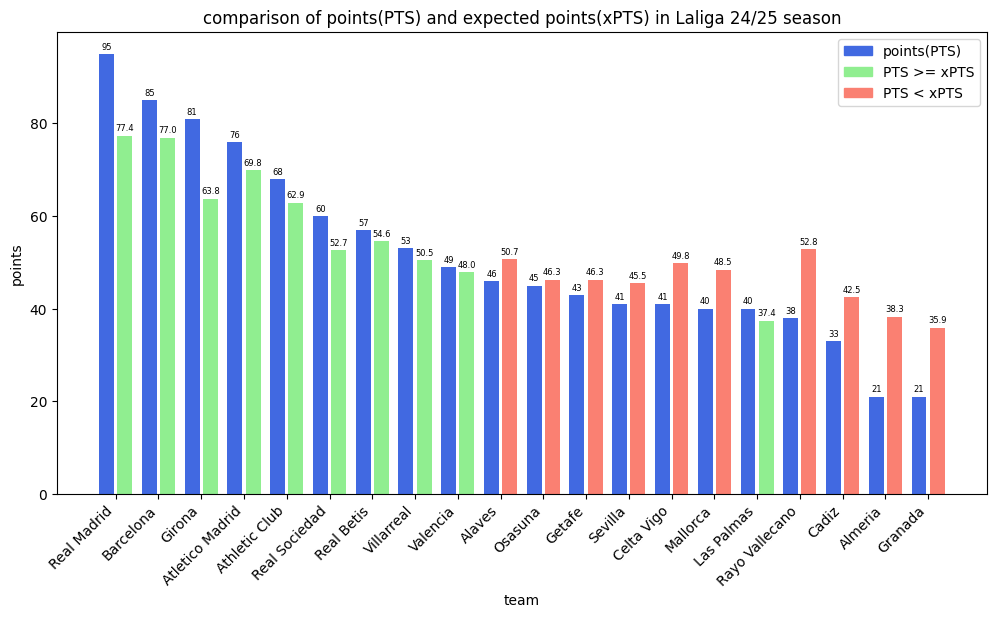

In [64]:
plt.figure(figsize=(12, 6))
bars_PTS = plt.bar(x - szerokosc / 1.65, PTS, szerokosc, label="points(PTS)", color="royalblue")
bars_xPTS = plt.bar(x + szerokosc / 1.65, xPTS, szerokosc, label="expected points(xPTS)", color=kolory_xPTS)

for i, (bar_PTS, bar_xPTS) in enumerate(zip(bars_PTS, bars_xPTS)):
    plt.text(bar_PTS.get_x() + bar_PTS.get_width() / 2, bar_PTS.get_height() + 1,
             f"{PTS[i]}", ha='center', fontsize=6)

    plt.text(bar_xPTS.get_x() + bar_xPTS.get_width() / 2, bar_xPTS.get_height() + 1,
             f"{xPTS[i]:.1f}", ha='center', fontsize=6, )

plt.xlabel("team")
plt.ylabel("points")
plt.title("comparison of points(PTS) and expected points(xPTS) in Laliga 24/25 season")
legend_patches = [
    mpatches.Patch(color='royalblue', label='points(PTS)'),
    mpatches.Patch(color='lightgreen', label='PTS >= xPTS'),
    mpatches.Patch(color='salmon', label='PTS < xPTS')
]
plt.legend(handles=legend_patches)
xticks = plt.xticks(x, druzyny, rotation=45, ha="right")
plt.show()

Scatter chart G from xG.

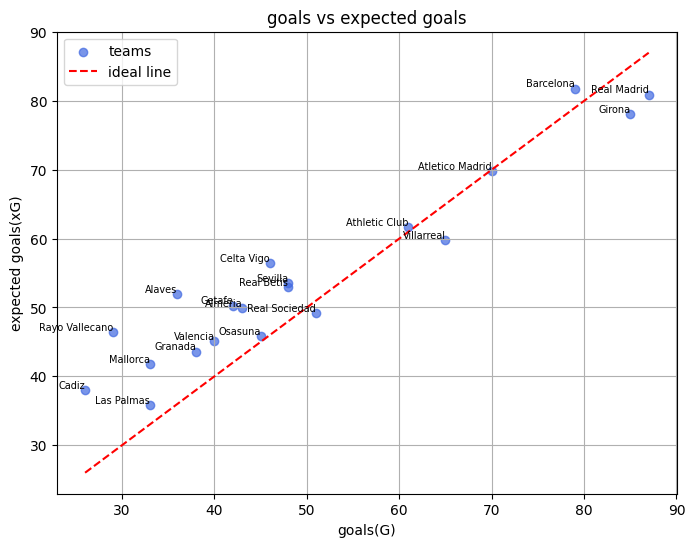

In [67]:
plt.figure(figsize=(8, 6))
plt.scatter(G, xG, color='royalblue', alpha=0.7, label='teams')
plt.plot([min(G), max(G)], [min(G), max(G)], linestyle='--', color='red', label='ideal line')
for i, team in enumerate(druzyny):
    plt.text(G[i], xG[i], team, fontsize=7, ha='right', va='bottom')
plt.xlabel("goals(G)")
plt.ylabel("expected goals(xG)")
plt.title("goals vs expected goals")
plt.legend()
plt.grid()
plt.show()

Teams below red line are able to take advantage of goal opportunities, teams above have problem with capitalizing actions.

Scatter chart PTS from xPTS.

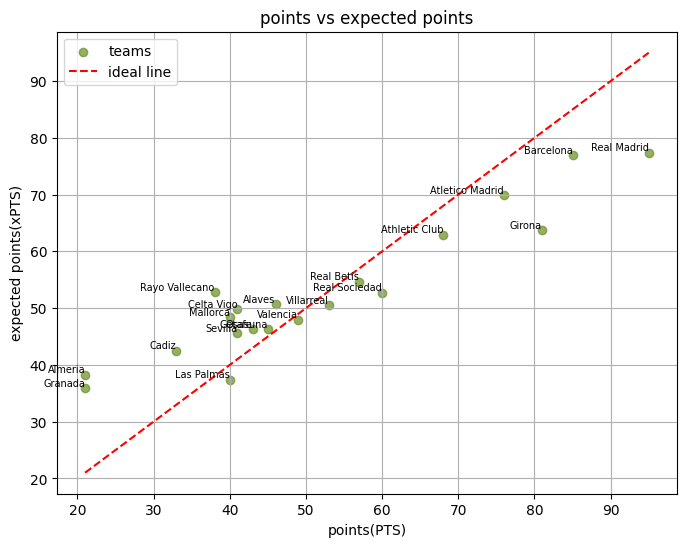

In [66]:
plt.figure(figsize=(8, 6))
plt.scatter(PTS, xPTS, color='olivedrab', alpha=0.7, label='teams')
plt.plot([min(PTS), max(PTS)], [min(PTS), max(PTS)], linestyle='--', color='red', label='ideal line')
for i, team in enumerate(druzyny):
    plt.text(PTS[i], xPTS[i], team, fontsize=7, ha='right', va='bottom')
plt.xlabel("points(PTS)")
plt.ylabel("expected points(xPTS)")
plt.title("points vs expected points")
plt.legend()
plt.grid()
plt.show()

Teams below red line are able to take advantage of goal opportunities better than their opponents, teams above have problem with winning matches.

## Conclusion

The visualisations show that only 5 out of 20 teams has lower amount of expected goals than actual goals, which is proof that majority of Laliga teams back these season were inefficient during goal opportunities.

Also, we see that half of the teams have positive points to expected points ratio, but these time result is dependent on performance of both teams playing each other. It measures efficienty in offense and defense.